# Homework 2 


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
TODO = "****TODO****"

## Problem 1: Implementing Linear Regression

Let's first implement multiple learning algorithms for linear regression. Remember our hypothesis function is

$$h(x;w) = w_0 + w_1  x_1 + w_2 x_2 + \cdots$$

In this case we are going to be learning just a single dimensional linear regression

$$h(x;w) = w_0 + w_1 x_1$$

Prompts

1.1: LinearRegression
- 1.1.1: Learn the linear regression model using a scikit learn package: `sklearn.linear_model import LinearRegression`. This learning algorithm uses linear least squares for a closed-form solution. Create an instance and then run `LinearRegression().fit(...)`. Report the learned weights w=[w_0, w_1]. Hint: use classifier.coef_ and classifier.intercept_. 
- 1.1.2: Report the train mean-square-error and test mean-squared-error for LinearRegression.

1.2: SGDRegressor
- 1.2.1: Learn the linear regression model using a scikit learn package `sklearn.linear_model import SGDRegressor`. This learning algorithm uses stochastic gradient descent to solve linear regression. Create an instance and then run `SGDRegressor(alpha=?).fit(...)`. Report the learned weights w=[w_0, w_1]. Find a good version of alpha. Hint: use classifier.coef_ and classifier.intercept_. 
- 1.2.2: Report the train mean-square-error and test mean-squared-error for SGDRegressor.

1.3: Least Squares
- 1.3.1: Solve for w_0, w_1 using linear least squares. Hint consider using `np.linalg.lstsq`. Report the learned weights `w=[w_0, w_1]`. Don't forget to add the column of 1s to your X matrix.
- 1.3.2: Report the train mean-square-error and test mean-squared-error.

1.4: Implement Gradient Descent
- 1.4.1: Finish implementation of `gradient_of_mean_squared_error` for linear regression. Print the gradient for the training data for a weight vector of `w=[0, 0]`. (Hint: use `gradient_of_mean_squared_error(...)`)
- 1.4.2: Finish implementation of `batch_gradient_descent_epoch` for linear regression. Print out the new weights after running this for a single iteration starting from `w=[0, 0]` with alpha=`1`)
- 1.4.3: Run `500 epochs` (steps) of gradient descent starting from `w=[0, 0]` with `alpha=0.01`. Create a plot where the y-axis is the train MeanSquaredError and the x-axis the epoch #.
- 1.4.4: Try various values of alpha, num_epochs, and initial values of w (note, see how the error plot changes with alpha. Consider trying various alphas at 10x apart: `[..., 100, 10, 1, 0.01, 0.001,...]`). Discuss what happens with various choices. What was the best alpha you found? How many epochs should you run? What is a good initialization for w?
- 1.4.5: Report solution for `w=[w_0, w_1]` for the best run of gradient descent. 
- 1.4.6: Report the train mean-square-error and test mean-squared-error for these weights.

1.5: Are the weights learned the same between all three approaches? Is the mean-squared-error the same? Discuss.

1.6: Extra credit: Why did we apply `X = StandardScaler().fit_transform(X)` to our LotArea X feature? What happens if we remove it?

In [2]:
# Code to implement linear regression prediction and mean squared error.
def linear_regression_predict(x: np.array, w: np.array) -> float:
    return w[0] + x.dot(w[1:])

def mean_squared_error(y_true, y_predicted) -> float:
  n = len(y)
  error = 0
  for truth, prediction in zip(y_true, y_predicted):
    absolute_error = truth - prediction
    error += absolute_error * absolute_error
  return error/n

In [3]:
# Load the heart disease dataset:
columns = ['LotArea', 'SalePrice']
housing_prices_dataframe = pd.read_csv("../../data/housing_prices.csv")[columns]
housing_prices_dataframe['SalePrice'] /= 1000

# Select out X and Y
X = housing_prices_dataframe[['LotArea']].values
y = housing_prices_dataframe['SalePrice'].values

# Apply standard scaler to X.
X = StandardScaler().fit_transform(X)

# =======================================================
# Our train and test dataset for this problem.
# =======================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
# Question 1.1.1
lr = LinearRegression().fit(X_train, y_train)
print(f"Solution to 1.1.1: linear regression weights are: {lr.coef_[0]} {lr.intercept_}")

Solution to 1.1.1: linear regression weights are: 17.97050580047713 180.90095813968003


In [5]:
# Question to 1.1.2
print(f"Solution to 1.1.2: Train MSE: {mean_squared_error(y_train, lr.predict(X_train))}, Test MSE; {mean_squared_error(y_test, lr.predict(X_test))}")

Solution to 1.1.2: Train MSE: 3921.823323480261, Test MSE; 1954.8256551478441


In [6]:
# Question 1.2.1
sgd = SGDRegressor(alpha=.01).fit(X_train, y_train)
print(f"Solution to 1.2.1: weights are: {sgd.coef_[0], sgd.intercept_[0]}")

Solution to 1.2.1: weights are: (16.576158573815686, 180.06384188895288)


In [7]:
# Question to 1.2.2
print(f"Solution to 1.2.2: Train MSE: {mean_squared_error(y_train, sgd.predict(X_train))}, Test MSE: {mean_squared_error(y_test, sgd.predict(X_test))}")

Solution to 1.2.2: Train MSE: 3924.1050135885785, Test MSE: 1963.5406298375376


In [8]:
# Question to 1.3.1
# Add a column of 1s to make this easier:
X_1s_augmented = np.hstack([np.ones(X_train.shape[0]).reshape(-1, 1), X_train])

# Least Squares
intercept, slope = np.linalg.lstsq(X_1s_augmented, y_train, rcond=None)[0]

print(f"Solution to 1.3.1: {slope} {intercept}")

Solution to 1.3.1: 17.970505800477145 180.90095813968003


In [9]:
# Question to 1.3.2
print(f"Solution to 1.3.2: Train MSE: {mean_squared_error(y_train, linear_regression_predict(X_train, [intercept, slope]))}, Test MSE; {mean_squared_error(y_test, linear_regression_predict(X_test, [intercept, slope]))}")

Solution to 1.3.2: Train MSE: 3921.8233234802624, Test MSE; 1954.8256551478435


### Gradient Descent for Linear Regression

Remember, on each update for gradient descent we need to update our weights as follows:
$$w_i^{(k+1)}:= w_i^k - \alpha \dfrac{∂}{∂w^{k}} J(w^{k})$$

The algorithm then iteratively updates the weights as follows:
$$
temp_0 := w_0 - \alpha \dfrac{∂}{∂{w_0}} J(w)\\
temp_1 := w_1 - \alpha \dfrac{∂}{∂{w_1}} J(w) \\
w_0 := temp_0 \\
w_1 := temp_1
$$

To implement `gradient_of_mean_squared_error` you will need to implement this gradient for each sample and then `batch_gradient_descent_epoch` will sum them up. Remember this is the gradient calculation:

$$
\dfrac{∂}{∂w_0}J(w) = \dfrac{∂}{∂_{w_0}} \dfrac{1}{N}\sum_{i}^N (h(x^{(i)}; w) - y^{(i)})^2
$$

$$
\dfrac{∂}{∂{w_0}}J(w) =\dfrac{2}{N}\sum_{i}^N (h(x^{(i)}; w) - y^{(i)})
$$

$$
\frac{∂}{∂w_1}J(w) = \frac{∂}{∂w_1} \frac{1}{N}\sum_{i}^N (h(x^{(i)}; w) - y^{(i)})^2
$$
$$
\frac{∂}{∂w_1}J(w) = \frac{2}{N}\sum_{i}^N (h(x^{(i)}; w) - y^{(i)}) x^{(i)}
$$


In [10]:
# Solution to 1.4.1
def gradient_of_mean_squared_error(X, y, w):
    """Calculate the gradient of MSE loss with respect to weights w
    
    Args:
      X: N x d matrix of X values (in this case d=1, we only have 1 feature)
      y: N x 1 vector of targets
      w: weight vector of length d+1 (in this case d=1)
      
    Return:
      d x 1 gradient vector - consisting of gradient of MSE loss. gradient[j] is
          the partial derivative of the MSE with respect to weight j averaged
          over all the samples
    """
    n = X.shape[0]
    k = X.shape[1]    
    predicted_y = linear_regression_predict(X, w)
    # Implement this:
    gradient = [0, 0]
    for i in range(n):
        gradient[0] += predicted_y[i] - y[i]
        gradient[1] += (predicted_y[i] - y[i]) * X[i]
    gradient[0] = (gradient[0] * 2 )/ n
    gradient[1] = (gradient[1] * 2 )/ n
    assert(len(gradient) == 2)
    return gradient
mean_gradient = gradient_of_mean_squared_error(X_train, y_train, [0, 0])
print(f"Solution to 1.4.1: {mean_gradient}")

Solution to 1.4.1: [-362.6253855185906, array([-54.6031857])]


In [11]:
# Questioin to 1.4.2
def batch_gradient_descent_epoch(X, y, w, alpha):
    """Returns new weights after one step of batch gradient descent
    across the entire dataset.
    
    Args:
      X: N x d matrix (in this case d=1, we only have 1 feature)
      y: N x 1 vector
      w: weight vector of length d+1 (in this case d=1)
      alpha: Floating point learning rate.
      
    Return:
      updated weights as a length-2 vector after 1 step of gradient descent.
    """
    n = X.shape[0]
    d = X.shape[1]
    
    # Evaluate the error gradient across the entire dataset. NOTE: there are various
    # versions of gradient descent that work differently here. In this case we are running
    # what is called 'Batch' gradient descen that updates based off the entire training
    # dataset on each epoch. Other techniques are mini-batch which break the dataset into
    # small chunks and stochastic gradient descent which uses only one sample at a time.
    error_gradient = gradient_of_mean_squared_error(X, y, w)
    assert(len(error_gradient) == d+1)
    return [(w[0] - (alpha * error_gradient[0])), (w[1] - (alpha * error_gradient[1]))]
update = batch_gradient_descent_epoch(X_train, y_train, [0, 0], 1)
print(f"Solution to 1.4.2: Single weight update: {update}")

Solution to 1.4.2: Single weight update: [362.6253855185906, array([54.6031857])]


Solution to 1.4.3: Plot:


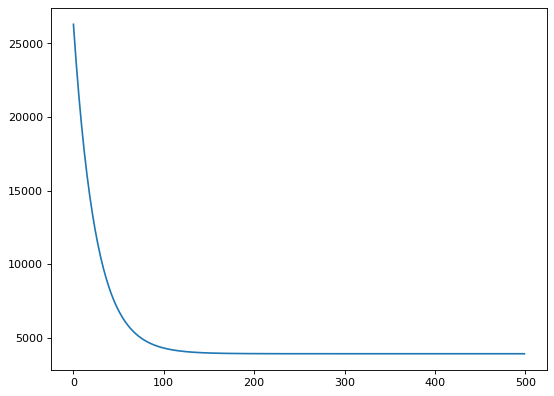

In [12]:
# Question to 1.4.3
fig = figure(figsize=(8, 6), dpi=80)
alpha = 0.01
weights_gradient_descent = [0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):  
    # TODO: implement gradient descent loop
    # 1. update the weights
    weights_gradient_descent = batch_gradient_descent_epoch(X_train, y_train, weights_gradient_descent, alpha)
    # 2. calculate and record the error using the current weights
    errors.append(mean_squared_error(y_train, linear_regression_predict(X_train, weights_gradient_descent)))
    pass
print("Solution to 1.4.3: Plot:")
plt.plot(errors)
plt.show()

Solution to 1.4.3: Plot:


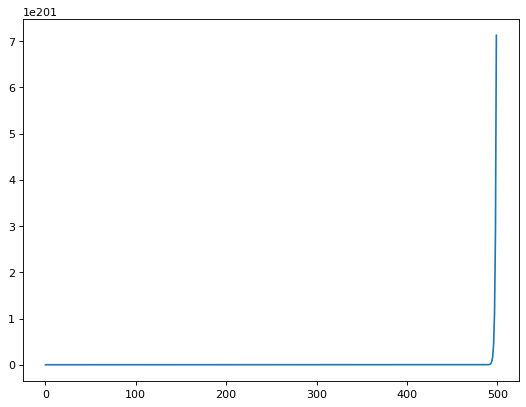

In [13]:
# Question 1.4.4
fig = figure(figsize=(8, 6), dpi=80)
alpha = 1
weights_gradient_descent = [0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    # TODO: implement gradient descent loop
    # 1. update the weights
    weights_gradient_descent = batch_gradient_descent_epoch(X_train, y_train, weights_gradient_descent, alpha)
    # 2. calculate and record the error using the current weights
    errors.append(mean_squared_error(y_train, linear_regression_predict(X_train, weights_gradient_descent)))
    pass
print("Solution to 1.4.3: Plot:")
plt.plot(errors)
plt.show()

Solution to 1.4.3: Plot:


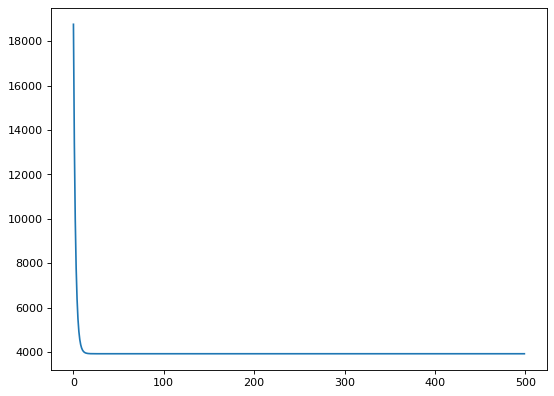

In [14]:
# Question 1.4.4
fig = figure(figsize=(8, 6), dpi=80)
alpha = .1
weights_gradient_descent = [0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    # TODO: implement gradient descent loop
    # 1. update the weights
    weights_gradient_descent = batch_gradient_descent_epoch(X_train, y_train, weights_gradient_descent, alpha)
    # 2. calculate and record the error using the current weights
    errors.append(mean_squared_error(y_train, linear_regression_predict(X_train, weights_gradient_descent)))
    pass
print("Solution to 1.4.3: Plot:")
plt.plot(errors)
plt.show()

Solution to 1.4.3: Plot:


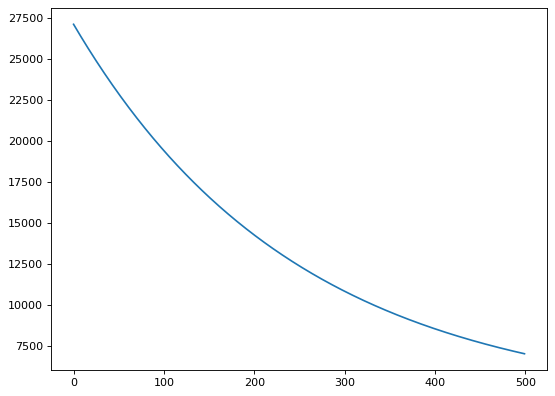

In [15]:
# Question 1.4.4
fig = figure(figsize=(8, 6), dpi=80)
alpha = .001
weights_gradient_descent = [0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    # TODO: implement gradient descent loop
    # 1. update the weights
    weights_gradient_descent = batch_gradient_descent_epoch(X_train, y_train, weights_gradient_descent, alpha)
    # 2. calculate and record the error using the current weights
    errors.append(mean_squared_error(y_train, linear_regression_predict(X_train, weights_gradient_descent)))
    pass
print("Solution to 1.4.3: Plot:")
plt.plot(errors)
plt.show()

In [16]:
# Question to 1.4.5
alpha = .1
weights_gradient_descent = [0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    weights_gradient_descent = batch_gradient_descent_epoch(X_train, y_train, weights_gradient_descent, alpha)

print(f"Solution to 1.4.5: {weights_gradient_descent}")

Solution to 1.4.5: [array([180.90095814]), array([17.9705058])]


In [17]:
# Question to 1.4.6
print(f"Solution to 1.4.6: Train MSE: {mean_squared_error(y_train, linear_regression_predict(X_train, weights_gradient_descent))}, {mean_squared_error(y_train, linear_regression_predict(X_test, weights_gradient_descent))}")

Solution to 1.4.6: Train MSE: [3921.82332348], [1931.20383365]


# Question 1.5
The weights learned are not same in the three approaches but they are very similar they have differences in the decimals. The mean squared error is also not the same but again we see that the results are similar.
This happens because the different approaches attempt to find the line of best fit in different ways that they end up with different weights and then due to the differences of weights
they end up getting different mean squared error.

# Extra Credit Question 1.6
StandardScaler was applied in order to normalize feature values before applying a machine learning model. StandardScaler normalizes the features columns
individually so that each feature column will have a mean value of 0 and a standard variation of 0. We applied StandardScaler.fit_transform(X) in order
to normalize our feature data so that when we run the machine learning models on the data we will get back easier to understand numbers. If we remove
the StandardScaler.fit_transform(X) the information we get back from the machine learning model will be more difficult to understand. Look at the code
below, the first print statement is without the StandardScaler and one of the weights are 0.0018010405863711303, while the other print statement has
StandardScaler applied, the same weight is 17.970505800477127. Clearly, 17.970505800477127 is easier to understand than 0.0018010405863711303 and that is exactly
why StandardScaler is utilized, it 'normalizes' the data so that us as humans can get back more understandable information after using the machine learning model.

In [18]:
# Extra Credit Question 1.6
# Select out X and Y
example_x = housing_prices_dataframe[['LotArea']].values
example_y = housing_prices_dataframe['SalePrice'].values

# Apply standard scaler to X.
example_x2 = StandardScaler().fit_transform(X)

# =======================================================
# Our train and test dataset for this problem.
# =======================================================
example_X_train, example_X_test, example_y_train, example_y_test = train_test_split(example_x, example_y, test_size=0.30, random_state=42)
lr = LinearRegression().fit(example_X_train, y_train)
print(f"linear regression weights are: {lr.coef_[0]} {lr.intercept_}")

example_X_train, example_X_test, example_y_train, example_y_test = train_test_split(example_x2, example_y, test_size=0.30, random_state=42)
lr = LinearRegression().fit(example_X_train, y_train)
print(f"linear regression weights are: {lr.coef_[0]} {lr.intercept_}")

linear regression weights are: 0.0018010405863711303 161.95972392376498
linear regression weights are: 17.970505800477127 180.90095813968003


## Problem 2: Implementing Logistic Regression

Now we will use logistic regression for classificaton: to predict heart disease using the same dataset as in Homework 1.

Gradient descent for logistic regression is very similar to linear regression but not quite the same. 

Note that in this problem, we are also using 3 different X variables instead of just 1 as in problem 1. Including a column of 1s for the bias term this means `d=4` so our X matrix will be of size `N x 4`, our weight vector will be of length `4`, and error gradient matrix will end up being `N x 4`.


2.1: Logistic Regression using Sklearn
- 2.1.1: Learn the logistic regression model using a scikit learn package: `sklearn.linear_model import LogisticRegression`. Create an instance and then run `LogisticRegression().fit(...)`. Report the learned weights w=[w_0, w_1, w_2, w_3]. Hint: use classifier.coef_ and classifier.intercept_ to get these out of the trained classifier. 
- 2.1.2: Report the train log-loss and test log-loss.
- 2.1.3: Report the train accuracy and test accuracy using a threshold of 0.5 on the probability prediction to get a classifier.

2.2: Gradient Descent for Logistic Regression
- 2.2.1: Finish implementation of `gradient_of_log_loss` for logistic regression. Print the gradient for the training data for a weight vector of `w=[0, 0, 0, 0]`. 
- 2.2.2: Finish implementation of `batch_gradient_descent_logreg_epoch` for logistic regression. Print out the new weights after running this for a single iteration starting from `w=[0, 0, 0, 0]` )
- 2.2.3: Run `500 epochs` (steps) of gradient descent starting from `w=[0, 0, 0, 0]` with `alpha=0.1`. Create a plot where the y-axis is the train log-loss and the x-axis the epoch #.
- 2.2.4: Try various values of alpha, num_epochs, and initial values of w (note, see how the error plot changes with alpha. Consider trying various alphas at 10x apart: `[..., 10, 1, 0.01, 0.001, 0.0001, ...]`). Discuss what happens with various choices. What was the best alpha you found? How many epochs should you run? What is a good initialization for w?
- 2.2.5: Report learned weights `w` for the best run of gradient descent. 
- 2.2.6: Report the train log-loss and test log-loss for these weights.
- 2.2.7: Report the train accuracy and test accuracy using a threshold of 0.5 on the probability prediction to get a classifier.

2.3: Derive $\frac{d \sigma}{dw}$ where $\sigma(x;w) = \frac{1}{1 + e^{-wx}}$

2.4: Extra credit: Why did we apply `StandardScaler()` to our varaibles X feature? What happens if we remove it?

2.5: Extra credit: We implemented `batch` gradient descent in which each step of gradient descent goes over every single example in the training set. If we wanted to instead implement `mini-batch` in which each step of gradient descent considerd only 50 examples of training data and updated the weights based on that gradient. What would change in our implementation? Discuss.


In [19]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [20]:
# Load the heart disease dataset:
columns = ['Age', 'Oldpeak', 'MaxHR', 'HeartDisease']
heart_disease_dataframe = pd.read_csv("../../data/heart.csv")[columns]

# Select out X and Y
X_hd = heart_disease_dataframe[['Age', 'Oldpeak', 'MaxHR']].values
y_hd = heart_disease_dataframe['HeartDisease'].values

# Apply standard scaler to X.
X_hd = StandardScaler().fit_transform(X_hd)

# =======================================================
# Our train and test dataset for this problem.
# =======================================================
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(X_hd, y_hd, test_size=0.30, random_state=42)

In [21]:
# Question to 2.1.1
lgr = LogisticRegression().fit(X_train_hd, y_train_hd)
print(f"Solution to 2.1.1: weights learned with sklearn LogisticRegression: {lgr.coef_, lgr.intercept_}")

Solution to 2.1.1: weights learned with sklearn LogisticRegression: (array([[ 0.20232843,  0.95339757, -0.79996645]]), array([0.23082056]))


In [22]:
# Solution to 2.1.2
print(f"Solution to 2.1.2: Log loss for sklearn LogisticRegression: Train: {log_loss(y_train_hd, lgr.predict(X_train_hd))}, Test: {log_loss(y_test_hd, lgr.predict(X_test_hd))}")

Solution to 2.1.2: Log loss for sklearn LogisticRegression: Train: 8.71549056724691, Test: 9.385641359151407


In [23]:
# Solution to 2.1.3
threshold_y_train, threshold_y_test = [], []
for i in y_train_hd:
    if i > 0.5:
        threshold_y_train.append(i)
    else:
        threshold_y_train.append(0)

for i in y_test_hd:
    if i > 0.5:
        threshold_y_test.append(i)
    else:
        threshold_y_test.append(0)

print(f"Solution to 2.1.3: Accuracy Train: {accuracy_score(threshold_y_train, lgr.predict(X_train_hd))}, Accuracy Test: {accuracy_score(threshold_y_test, lgr.predict(X_test_hd))}")

Solution to 2.1.3: Accuracy Train: 0.7476635514018691, Accuracy Test: 0.7282608695652174


### Gradient Descent for Logistic Regression

Our hypothesis function for logistic regression is
$$h(x; w) = \frac{1}{1 + e^{-(w_0 + w_1 x_1 + w_2 x_2 + \dots)}}$$

#### Trick: Adding bias term to simplify notation
To simplify our notation, we will add a column to x called $x_0$ which always consists of 1s, this makes all our calculations simpler and we can write this in matrix form

$$\frac{1}{1 + e^{-(w_0 x_0 + w_1 x_1 + w_2 x_2 + \dots)}} :=  \frac{1}{1 + e^{-w^T  x}}$$

#### Vector and Matrix notation

Notice we now represent the weights * x as a dot product $w^Tx = w_0 x_0 + w_1x_1 + \dots$

It's always helpful to keep track of dimensions to understand vector/matrix operations:
- $w$: is of size $(d x 1)$
- $x$ is of size $(d x 1)$
- $w^T x$ is a scalar $(1 x 1)$

This allows us a nice trick too, we can calculate logistic regression hypothesis function for multiple samples simultaneously using matrix operations. 

If we introduce a matrix of samples: $X$ is of size $(N x d)$ where each row is a sample and the columns are dimensions, we can then evaluate the entire expression:

$X\cdot w$ is a vector $(N x 1)$

$$X\cdot w = \begin{pmatrix} 
w_0 x^{(0)}_0 + w_1x^{(0)}_1 + \cdots \\
w_0 x^{(1)}_0 + w_1x^{(1)}_1 + \cdots \\
\cdots \\
w_0 x^{(N)}_0 + w_1x^{(N)}_1 + \cdots
\end{pmatrix}$$

We can re-write our whole hypothesis function, then, in matrix form:

$$h(X;w) :=  \frac{1}{1 + e^{-X\cdot w}}$$

And in python this is:
```def logistic_regression_predict(X, w):
    return 1 / (1 + np.exp(-X.dot(w)))```


### Deriving Gradient Descent for Logistic Regression

Remember, on each update for gradient descent we need to update our weights as follows:
$$w_i^{(k+1)}:= w_i^k - \alpha \dfrac{∂}{∂w^{k}} J(w^{k})$$

The algorithm then iteratively updates all the weights as follows:
$$
\forall j: temp_j := w_j - \alpha \dfrac{∂}{∂{w_j}} J(w)\\
\forall j: w_j := temp_j \\
$$

To implement `gradient_of_log_loss` you will need to implement this gradient for each sample and then `batch_gradient_descent_logreg_epoch` will sum them up. 

Remember, log loss (also known as binary cross entropy) is defined as follows:

$$
J(w) = -\frac{1}{n}\sum_{i}^n y^{(i)} \cdot log(h(x^{(i)}; w)) + (1 - y^{(i)}) log(1 - h(x^{(i)}; w))
$$

The partial gradient turns out to be quite simple using the chain rule if we break up the loss function equation into parts. Note that this uses vector calculus which you may not be familiar with, but it is just using the matrix/vector notation described above.

Let:
$$g = X\cdot w$$
$$z = \sigma(g) = \frac{1}{1 + e^{-g}}$$

So that:
$$J(w) = -(y \cdot log(z) + (1 - y) \cdot log(1 - z))$$

Apply the chain rule and you get:
$$
\dfrac{∂ J(w)}{∂{w}} = \dfrac{∂ J(w)}{∂{z}} \dfrac{∂ z}{∂{g}} \dfrac{∂ g}{∂{w}} 
$$

The first term is:
$$\dfrac{∂ J(w)}{∂{z}} = -(\frac{y}{z} - \frac{1 - y}{1 - z}) = \frac{z-y}{z(1-z)}$$

The derivative of the sigmoid $z$ has a nice simple form:
$$\dfrac{∂ z}{∂{g}} = z\cdot(1 - z)$$

Lastly the derivative of $g$ is just a linear function like LinearRegression, which, as we remember just ends up being the vector of x values.
$$\dfrac{∂ g}{∂{w}} = X$$

Putting this all back together, it will simplify to:
$$\dfrac{∂ J(w)}{∂{w}} = X ^T (z - y)$$

To help understand: just to check the above, let's look matrix/vector sizes and what they represent:
- $X$ is a matrix of size $(N x d)$ where each row is a sample and each column is a dimension of x
- $z$ is a vector of size $(N x 1)$ consisting of the model predictions for each samples 
- $y$ is a vector of size $(N x 1)$ consisting of the true labels for each sample
- $(z - y)$ is a vector of $(N x 1)$ consisting of the difference between predictions and true values
- $X ^T (z - y)$ is a matrix of size $(d x N)$
- $\dfrac{∂ J(w)}{∂{w}}$ is a matrix of size $(d x 1)$ where each element is:

$$
\dfrac{∂J(w)}{∂{w_j}}  = \frac{1}{N}\sum_{i}^N x_j^{(i)} (h(x^{(i)}; w) - y^{(i)})
$$

(Note the division by N to get the average gradient across all samples)


Wow! it looks almost identical to linear regression!

In [24]:
# Add a column of 1s to make things easier. This means we don't need that
# hanging w_0 and can evaluate everything at once.
X_train_hd_with_1s = np.hstack([np.ones(X_train_hd.shape[0]).reshape(-1,1), X_train_hd])
X_test_hd_with_1s = np.hstack([np.ones(X_test_hd.shape[0]).reshape(-1,1), X_test_hd])

In [25]:
# Question to 2.2.1
def logistic_regression_predict(X, w):
    """ Calculate logistic regression for N samples
     Args:
      X: N x d matrix of X values
      w: weight vector of length d
      
    Return:
      N x 1 vector of predictions
    """
    return 1 / (1 + np.exp(-X.dot(w)))

def gradient_of_log_loss(X, y, w):
    """Calculate the gradient of log loss (aka binary cross entropy) with respect to weights w
    
    Args:
      X: N x d matrix of X values
      y: N x 1 vector of targets
      w: weight vector of length d
      
    Return:
      d x 1 gradient vector - consisting of gradient of log loss. gradient[j] is
          the partial derivative of the loss with respect to weight j averaged over
          all N incoming samples
    """
    N = X.shape[0]
    d = X.shape[1]
    predicted_y = logistic_regression_predict(X, w)
    error = predicted_y - y
    # TODO implement the gradient vector
    gradient = [0, 0, 0, 0]
    for i in range(N):
        gradient[0] += X[i][0] * (predicted_y[i] - y[i])
        gradient[1] += X[i][1] * (predicted_y[i] - y[i])
        gradient[2] += X[i][2] * (predicted_y[i] - y[i])
        gradient[3] += X[i][3] * (predicted_y[i] - y[i])
    for i in range(len(gradient)):
        gradient[i] = gradient[i]/N
    # Ensure it is the right size!
    assert len(gradient) == d
    return gradient

mean_gradient = gradient_of_log_loss(X_train_hd_with_1s, y_train_hd, [0, 0, 0, 0])
print(f"Solution to 2.2.1: {mean_gradient}")

Solution to 2.2.1: [-0.03582554517133956, -0.152789514469371, -0.21945984268990038, 0.19108075553195383]


In [26]:
# Question to 2.2.2
def batch_gradient_descent_logreg_epoch(X, y, w, alpha):
    """Returns new weights after one step of batch gradient descent
    across the entire dataset.
    
    Args:
      X: N x d matrix 
      y: N x 1 vector
      w: weight vector of length d
      alpha: Floating point learning rate.
      
    Return:
      updated weights as a length-d vector after 1 step of gradient descent.
    """
    n = X.shape[0]
    d = X.shape[1]
    
    # Evaluate the error gradient across the entire dataset. NOTE: there are various
    # versions of gradient descent that work differently here. In this case we are running
    # what is called 'Batch' gradient descent that updates based off the entire training
    # dataset on each epoch. Other techniques are mini-batch which break the dataset into
    # small chunks and stochastic gradient descent which uses only one sample at a time.
    error_gradient = gradient_of_log_loss(X, y, w)
    
    # Update our weights based on the gradient update.
    new_weights = [0, 0, 0, 0]
    new_weights[0]  = w[0] - (alpha * error_gradient[0])
    new_weights[1]  = w[1] - (alpha * error_gradient[1])
    new_weights[2]  = w[2] - (alpha * error_gradient[2])
    new_weights[3]  = w[3] - (alpha * error_gradient[3])
    # Make sure it is the right size:
    assert len(new_weights) == d
    return new_weights

update = batch_gradient_descent_logreg_epoch(X_train_hd_with_1s, y_train_hd, [0, 0, 0, 0], 5)
print(f"Solution to 2.2.2: Single weight update: {update}")

Solution to 2.2.2: Single weight update: [0.1791277258566978, 0.763947572346855, 1.0972992134495019, -0.9554037776597691]


Question to 2.2.4

TODO: answer to question 2.2.4

Solution to 2.2.3: Plot: TODO


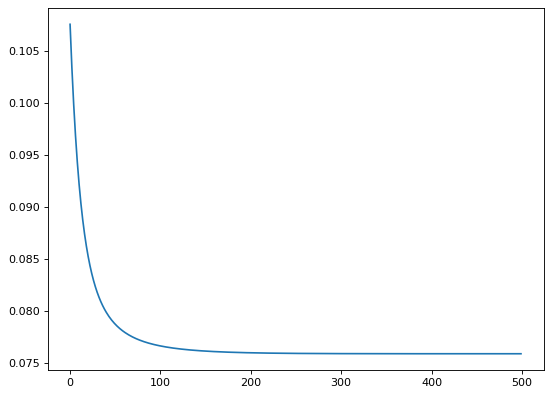

In [27]:
# Question to 2.2.3
from matplotlib.pyplot import figure
fig = figure(figsize=(8, 6), dpi=80)
# Learning Rate
alpha = 0.1
weights_gradient_descent = [0, 0, 0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    # TODO: implement gradient descent loop
    # 1. update the weights
    weights_gradient_descent = batch_gradient_descent_logreg_epoch(X_train_hd_with_1s, y_train_hd, weights_gradient_descent, alpha)
    # 2. calculate and record the error using the current weights
    errors.append(mean_squared_error(y_train_hd, logistic_regression_predict(X_train_hd_with_1s, weights_gradient_descent)))
    pass
print("Solution to 2.2.3: Plot: TODO")
plt.plot(errors)
plt.show()

Solution to 2.2.3: Plot: TODO


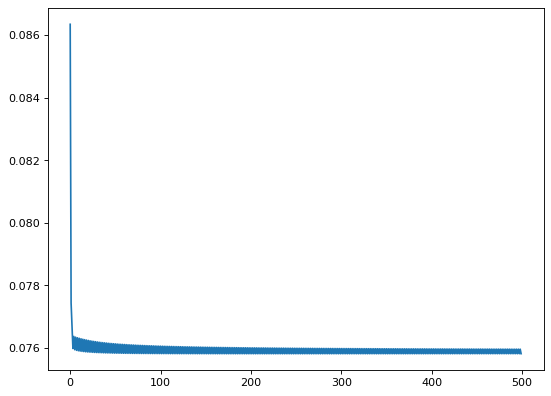

In [28]:
# Question to 2.2.4
from matplotlib.pyplot import figure
fig = figure(figsize=(8, 6), dpi=80)
# Learning Rate
alpha = 10
weights_gradient_descent = [0, 0, 0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    # TODO: implement gradient descent loop
    # 1. update the weights
    weights_gradient_descent = batch_gradient_descent_logreg_epoch(X_train_hd_with_1s, y_train_hd, weights_gradient_descent, alpha)
    # 2. calculate and record the error using the current weights
    errors.append(mean_squared_error(y_train_hd, logistic_regression_predict(X_train_hd_with_1s, weights_gradient_descent)))
    pass
print("Solution to 2.2.3: Plot: TODO")
plt.plot(errors)
plt.show()

Solution to 2.2.3: Plot: TODO


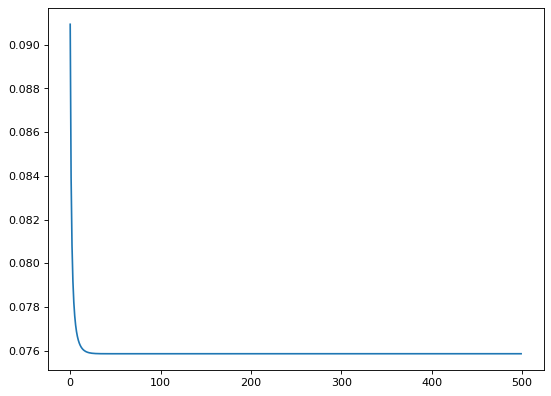

In [29]:
# Question to 2.2.4
from matplotlib.pyplot import figure
fig = figure(figsize=(8, 6), dpi=80)
# Learning Rate
alpha = 1
weights_gradient_descent = [0, 0, 0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    # TODO: implement gradient descent loop
    # 1. update the weights
    weights_gradient_descent = batch_gradient_descent_logreg_epoch(X_train_hd_with_1s, y_train_hd, weights_gradient_descent, alpha)
    # 2. calculate and record the error using the current weights
    errors.append(mean_squared_error(y_train_hd, logistic_regression_predict(X_train_hd_with_1s, weights_gradient_descent)))
    pass
print("Solution to 2.2.3: Plot: TODO")
plt.plot(errors)
plt.show()

Solution to 2.2.3: Plot: TODO


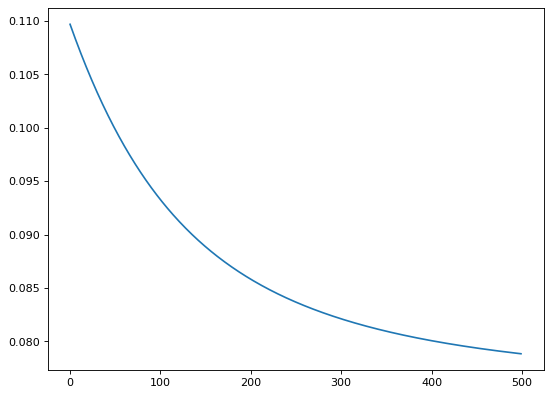

In [30]:
# Question to 2.2.4
from matplotlib.pyplot import figure
fig = figure(figsize=(8, 6), dpi=80)
# Learning Rate
alpha = .01
weights_gradient_descent = [0, 0, 0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    # TODO: implement gradient descent loop
    # 1. update the weights
    weights_gradient_descent = batch_gradient_descent_logreg_epoch(X_train_hd_with_1s, y_train_hd, weights_gradient_descent, alpha)
    # 2. calculate and record the error using the current weights
    errors.append(mean_squared_error(y_train_hd, logistic_regression_predict(X_train_hd_with_1s, weights_gradient_descent)))
    pass
print("Solution to 2.2.3: Plot: TODO")
plt.plot(errors)
plt.show()

Solution to 2.2.3: Plot: TODO


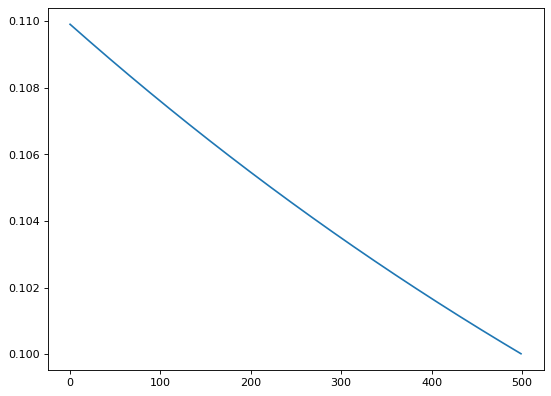

In [31]:
# Question to 2.2.4
from matplotlib.pyplot import figure
fig = figure(figsize=(8, 6), dpi=80)
# Learning Rate
alpha = .001
weights_gradient_descent = [0, 0, 0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    # TODO: implement gradient descent loop
    # 1. update the weights
    weights_gradient_descent = batch_gradient_descent_logreg_epoch(X_train_hd_with_1s, y_train_hd, weights_gradient_descent, alpha)
    # 2. calculate and record the error using the current weights
    errors.append(mean_squared_error(y_train_hd, logistic_regression_predict(X_train_hd_with_1s, weights_gradient_descent)))
    pass
print("Solution to 2.2.3: Plot: TODO")
plt.plot(errors)
plt.show()

Solution to 2.2.3: Plot: TODO


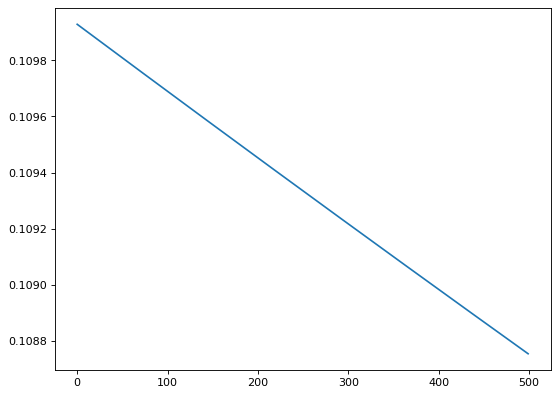

In [32]:
# Question to 2.2.4
from matplotlib.pyplot import figure
fig = figure(figsize=(8, 6), dpi=80)
# Learning Rate
alpha = .0001
weights_gradient_descent = [0, 0, 0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    # TODO: implement gradient descent loop
    # 1. update the weights
    weights_gradient_descent = batch_gradient_descent_logreg_epoch(X_train_hd_with_1s, y_train_hd, weights_gradient_descent, alpha)
    # 2. calculate and record the error using the current weights
    errors.append(mean_squared_error(y_train_hd, logistic_regression_predict(X_train_hd_with_1s, weights_gradient_descent)))
    pass
print("Solution to 2.2.3: Plot: TODO")
plt.plot(errors)
plt.show()

In [33]:
# Question to 2.2.5
# Learning Rate
alpha = .01
weights_gradient_descent = [0, 0, 0, 0]
num_epochs = 500
errors = []
for epoch in range(0, num_epochs):
    weights_gradient_descent = batch_gradient_descent_logreg_epoch(X_train_hd_with_1s, y_train_hd, weights_gradient_descent, alpha)

print(f"Solution to 2.2.5: {weights_gradient_descent}")

Solution to 2.2.5: [0.10709787233701586, 0.28812302214124913, 0.5605398877034028, -0.48039336330785426]


In [34]:
# Question to 2.2.6
print(f"Solution to 2.2.6: Log loss Train: {log_loss(y_train_hd, logistic_regression_predict(X_train_hd_with_1s, weights_gradient_descent))}, Test: {log_loss(y_test_hd, logistic_regression_predict(X_test_hd_with_1s, weights_gradient_descent))}")

Solution to 2.2.6: Log loss Train: 0.540040644314593, Test: 0.5533853372611662


In [35]:
# Question to 2.2.7
y_train_pred, y_test_pred, threshold = [], [], 0.5
for i in logistic_regression_predict(X_train_hd_with_1s, weights_gradient_descent):
    if i > threshold:
        y_train_pred.append(1)
    else:
        y_train_pred.append(0)

for i in logistic_regression_predict(X_test_hd_with_1s, weights_gradient_descent):
    if i > threshold:
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)
print(f"Solution to 2.2.7: Accuracy Train: {accuracy_score(y_train_hd, y_train_pred)}, Test: {accuracy_score(y_test_hd, y_test_pred)}")

Solution to 2.2.7: Accuracy Train: 0.7538940809968847, Test: 0.717391304347826


# Question 2.3
2.3: Derive $\frac{d \sigma}{dw}$ where $\sigma(x;w) = \frac{1}{1 + e^{-wx}}$
= $\frac{d}{dw}(1 + e^{-wx})^{-1}$ <--- Apply Chain Rule

= $- (1) \frac{\frac{d}{dw}(1 + e^{-wx})}{(1 + e^{-wx})^2}$ <--- Finish off the derivative

$\frac{d}{dw}(1 + e^{-wx}) = 0 + -xe^{-wx}$ <--- Apply Chain Rule to derive $e^{-wx}$

$\frac{d \sigma}{dw}$ = $\frac{xe^{-w}x}{(1 + e^{-wx})^2}$ <---- final result


# Extra Credit Question 2.4
StandardScaler was applied in order to normalize feature values before applying a machine learning model. StandardScaler normalizes the features columns
individually so that each feature column will have a mean value of 0 and a standard variation of 0. We applied StandardScaler.fit_transform(X) in order
to normalize our feature data so that when we run the machine learning models on the data we will get back easier to understand numbers. If we remove
the StandardScaler.fit_transform(X) the information we get back from the machine learning model will be more difficult to understand. In other words
if we remove StandardScaler the weights may be very long decimals instead of easier to read numbers. Essentially,
StandardScaler is utilized, it 'normalizes' the data so that us as humans can get back more understandable information after using the machine learning model.

# Extra Credit Question 2.5
If we choose to consider 50 examles of training data instead of going over every single example in the training set, than we would change the loop's range.
The new loop range would only include the 50 examples of training data that we want. The implementation would not really change much, just the range of the for
loop would change.